In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib

# Analyse Dataset

## Import and prepare data
The data.csv is too big for overleaf so you can find it here:
https://yaon.org/data.csv

In [32]:
'''import csv'''
import requests
import os.path

CSV_URL = 'https://yaon.org/data.csv'
FILE_NAME = 'data.csv'

if not os.path.isfile(FILE_NAME):
    print(f'Downloading {FILE_NAME}')
    r = requests.get(CSV_URL)
    with open(FILE_NAME, 'wb') as f:
        f.write(r.content)
else:
    print(f'{FILE_NAME} already exists')

import_df = pd.read_csv(FILE_NAME)
import_df.drop(columns=['Unnamed: 0'], inplace=True)
'''Format dataframe'''
df = import_df.pivot_table(index=['Country', 'Year'], columns='Variable', values='Value', aggfunc='first')
df.reset_index(inplace=True)

df.head()

data.csv already exists


Variable,Country,Year,% of agricultural GVA produced by irrigated agriculture,% of agricultural water managed area equipped for irrigation,% of area equipped for full control irrigation actually irrigated,% of area equipped for irrigation by desalinated water,% of area equipped for irrigation by direct use of treated municipal wastewater,% of area equipped for irrigation by direct use of agricultural drainage water,% of area equipped for irrigation by direct use of non-treated municipal wastewater,% of area equipped for irrigation by groundwater,...,Total water withdrawal,Total water withdrawal per capita,Treated municipal wastewater,Treated municipal wastewater discharged (secondary water),Urban population,Urban population with access to safe drinking-water (JMP),Water resources: total external renewable,Water withdrawal for aquaculture,Water withdrawal for cooling of thermoelectric plants,Water withdrawal for livestock (watering and cleaning)
0,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,932.865,NaN,18.18,NaN,NaN,NaN
1,Afghanistan,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,984.350,NaN,18.18,NaN,NaN,NaN
2,Afghanistan,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1038.852,NaN,18.18,NaN,NaN,NaN
3,Afghanistan,1967,NaN,100.0,NaN,NaN,NaN,NaN,NaN,15.399632,...,NaN,NaN,NaN,NaN,1096.428,NaN,18.18,NaN,NaN,NaN
4,Afghanistan,1968,NaN,100.0,NaN,NaN,NaN,NaN,NaN,15.461053,...,NaN,NaN,NaN,NaN,1157.827,NaN,18.18,NaN,NaN,NaN


## Find for us relevant variables
The following list contains all availible variables in the Dataset:

In [33]:
for var in df.columns:
    print(var)

Country
Year
% of agricultural GVA produced by irrigated agriculture
% of agricultural water managed area equipped for irrigation
% of area equipped for full control irrigation actually irrigated
% of area equipped for irrigation by desalinated water
% of area equipped for irrigation by direct use of  treated municipal wastewater
% of area equipped for irrigation by direct use of agricultural drainage water 
% of area equipped for irrigation by direct use of non-treated municipal wastewater
% of area equipped for irrigation by groundwater 
% of area equipped for irrigation by mixed surface water and groundwater
% of area equipped for irrigation by surface water
% of area equipped for irrigation drained
% of area equipped for irrigation power irrigated
% of area equipped for irrigation salinized
% of irrigation potential equipped for irrigation
% of the agricultural holdings with irrigation managed by women
% of the area equipped for irrigation actually irrigated
% of the area equipped 

Now we should define which variables and (maybe not yet) countries we want to look at. Please define those in the following code:

In [34]:
'''relevant variables for us'''
relevant_vars = ['Total water withdrawal',
                 'Agricultural water withdrawal',

                 ]
'''filter countries (no filter if empty)'''
filter_countries = []

## Analyse useabla Data
The following code constructs a heatmap showing if countries have data for our relevant variables for every year.

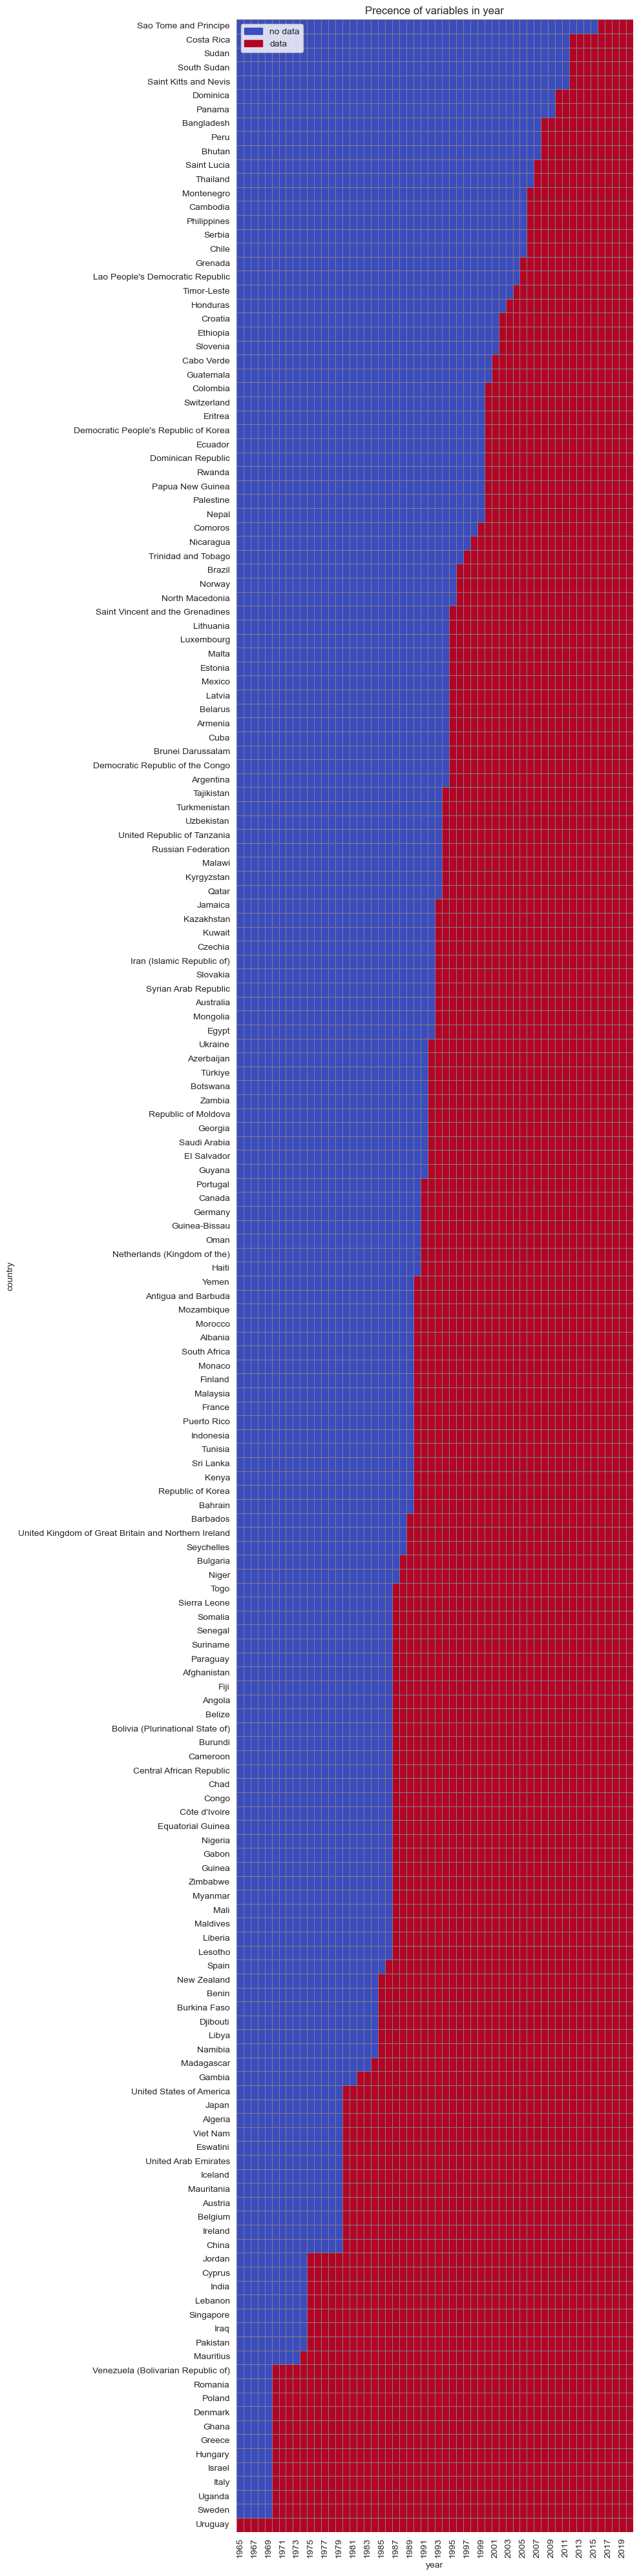

In [35]:
'''Extract relevant variables and drop all NaN'''
data = df[['Country', 'Year', *relevant_vars]]
if filter_countries:
    data = data[data['Country'].isin(filter_countries)]
data = data.dropna()

'''Create dataframe for heatmap'''
years_data = data[['Country', 'Year']]
years_df = years_data.pivot_table(index=['Country'], columns='Year', values='Year', aggfunc=lambda x: True,
                                  fill_value=False)
years_df['True_Count'] = years_df.sum(axis=1)
years_df = years_df.sort_values(by='True_Count', ascending=True)
years_df.drop('True_Count', axis=1, inplace=True)

'''spaß mit colormap'''
cmap_name = 'coolwarm'
cmap = matplotlib.colormaps[cmap_name]
color_0 = cmap(0.0)
color_1 = cmap(1.0)

'''create heatmap'''
plt.figure(figsize=(10, math.ceil(math.log(years_data['Country'].nunique(), 2)) * 5))
ax = sns.heatmap(years_df,
                 annot=False,
                 cmap=cmap_name,
                 linewidths=0.5,
                 linecolor='gray',
                 cbar=False
                 )

# Manuelle Legende
blue_patch = mpatches.Patch(color=color_0, label='no data')
red_patch = mpatches.Patch(color=color_1, label='data')
plt.legend(handles=[blue_patch, red_patch], loc='upper left')

plt.title('Precence of variables in year')
plt.xlabel('year')
plt.ylabel('country')

plt.tight_layout()
plt.show()